<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/Svetozarov-Andrey-branch/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D0%B8%D0%B4%D0%B5%D0%BE_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import IFrame

# Ссылка на видео
video_url = "https://drive.google.com/file/d/1HsPxOrnLD4K155OFFvOn2LSROPtlei8x/preview"

# Отображаем видео через IFrame
IFrame(video_url, width="640", height="480")



In [ ]:
import requests
import cv2
import os

# Скачиваем видео с Google Диска
video_url = "https://drive.google.com/file/d/1HsPxOrnLD4K155OFFvOn2LSROPtlei8x/preview"
video_id = video_url.split("/")[-2]
download_url = f"https://drive.google.com/uc?export=download&id={video_id}"
response = requests.get(download_url, stream=True)

# Создаем папку "Frames", если она не существует
if not os.path.exists("Frames"):
    os.makedirs("Frames")

frame_count = 0

# Открываем видео с помощью OpenCV
with open(f"video_{video_id}.mp4", "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

cap = cv2.VideoCapture(f"video_{video_id}.mp4")

# Разложение видео на кадры и сохранение в папку "Frames"
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    frame_filename = f"Frames/frame_{frame_count:04d}.jpg"

    # Сохраняем текущий кадр
    cv2.imwrite(frame_filename, frame)

cap.release()
cv2.destroyAllWindows()

print(f"Количество сохраненных кадров: {frame_count}")


Количество сохраненных кадров: 300


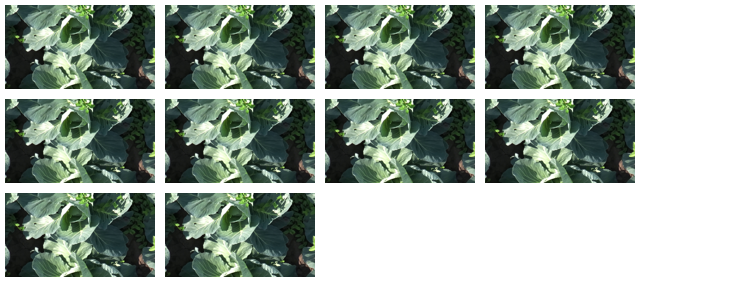

In [ ]:
from IPython.display import display
import glob
from PIL import Image, ImageOps, ImageDraw

# Получаем список файлов с кадрами
frame_files = sorted(glob.glob("Frames/*.jpg"))

# Вывод миниатюрных изображений
thumbnails = []
for i in range(10):
    img = Image.open(frame_files[i])
    img.thumbnail((150, 150))
    thumbnails.append(img)

# Создаем монтаж изображений для вывода
montage_width = 750
montage_height = 300
montage = Image.new(mode='RGB', size=(montage_width, montage_height), color="white")

x_offset = 0
y_offset = 0

for thumbnail in thumbnails:
    thumbnail_with_border = ImageOps.expand(thumbnail, border=5, fill="white")
    montage.paste(thumbnail_with_border, (x_offset, y_offset))
    x_offset += thumbnail_with_border.width
    if x_offset + thumbnail_with_border.width > montage_width:
        x_offset = 0
        y_offset += thumbnail_with_border.height

display(montage)

#вывод на печать 10 первых кадров: